In [1]:
%load_ext autoreload
%autoreload 2

The network consists of three EE cells connected in series, processing two external input signals. The configuration is specified in a JSON file (`config.json`).

Excitatory Input

The impulse response (IR) of the first input is defined as:

λ1(t)=Asin⁡(ωst)+Bsin⁡(ωnt)+C

Second Input:

λ2(t)=Dsin⁡(ωnt)+EλI​(t)=Dsin(ωn​t)+E

In [2]:
import numpy as np

def generate_sine_wave(freq, duration, fs):
    """
    Generates a sine wave of a given frequency and duration.
    
    Parameters:
        freq (float): Frequency of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        fs (float): Sampling frequency in Hz.
    
    Returns:
        np.ndarray: Generated sine wave.
    """
    t = np.arange(0, duration, 1/fs)
    sine_wave = np.sin(2 * np.pi * freq * t)
    return sine_wave

# Parameters
fs = 1000  # Sampling frequency
duration = 1.0  # Duration in seconds
freq1 = 5  # Frequency of the first sine wave
freq2 = 7  # Frequency of the second sine wave

# Generate sine waves
sine_wave1 = generate_sine_wave(freq1, duration, fs)
sine_wave2 = generate_sine_wave(freq2, duration, fs)
sine_wave2 += sine_wave1

## Network Forward

In [3]:
from cd_network.network import NeuralNetwork

if __name__ == '__main__':
    # Load the neural network configuration from a JSON file
    config_path = r'config.json'  # Path to the configuration file
    network = NeuralNetwork(config_path)

    # Define external inputs for the network
    external_inputs = {
        'external1': sine_wave1,
        'external2': sine_wave2
                }

    # Run the network with the provided external inputs
    outputs = network.run_network(external_inputs)

## Plot Outputs

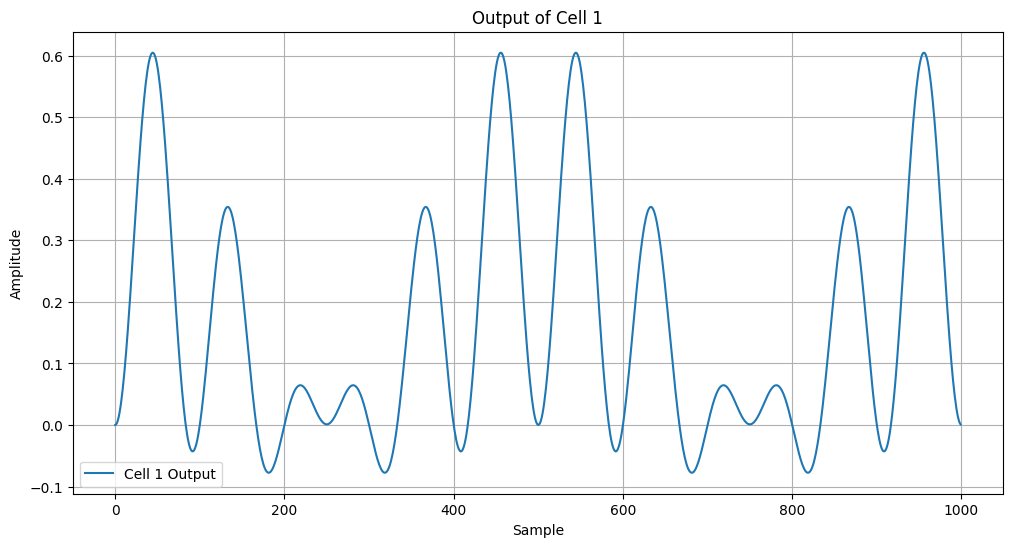

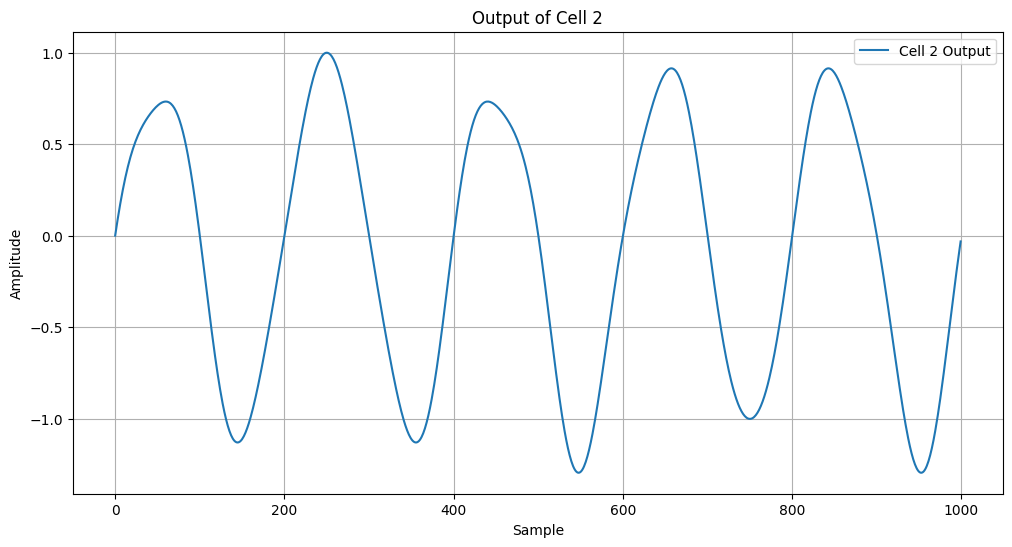

In [4]:
import matplotlib.pyplot as plt

# Extract outputs from cell1 and cell2
cell1_output = outputs['cell1']
cell2_output = outputs['cell2']

# Plot the outputs of cell1
plt.figure(figsize=(12, 6))
plt.plot(cell1_output, label='Cell 1 Output')
plt.title('Output of Cell 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the outputs of cell2
plt.figure(figsize=(12, 6))
plt.plot(cell2_output, label='Cell 2 Output')
plt.title('Output of Cell 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
